## Assocaition subtypes language (Story and Math)

In [31]:
# first on terminal install cairo : "sudo apt install libcairo2-dev"
# devtools::install_github("hadley/svglite")
#devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)

In [6]:
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

In [23]:
MyData_math <- read.csv(file="/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/math_r2.csv")
MyData_story <- read.csv(file="/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/story_r2.csv")
sprintf('Math R-squared table:')
MyData_math
sprintf('Story R-squared table:')
MyData_story

[1] "Math R-squared table:"

pheno,sub1,sub2,sub3,sub4,sub5
PicVocab_Unadj,0.03248545,0.03539872,0.008939249,0.03478213,0.010276055
ListSort_Unadj,0.02725906,0.03155059,0.009494469,0.03418382,0.008748025
ReadEng_Unadj,0.03682303,0.03884683,0.012797661,0.03389286,0.008986407


[1] "Story R-squared table:"

pheno,sub1,sub2,sub3,sub4,sub5
PicVocab_Unadj,0.05727871,0.06867612,0.03872336,0.02457047,0.006398797
ListSort_Unadj,0.03697380,0.04603497,0.02709801,0.03003229,0.003600421
ReadEng_Unadj,0.04166119,0.04356326,0.03701255,0.02433250,0.005820481


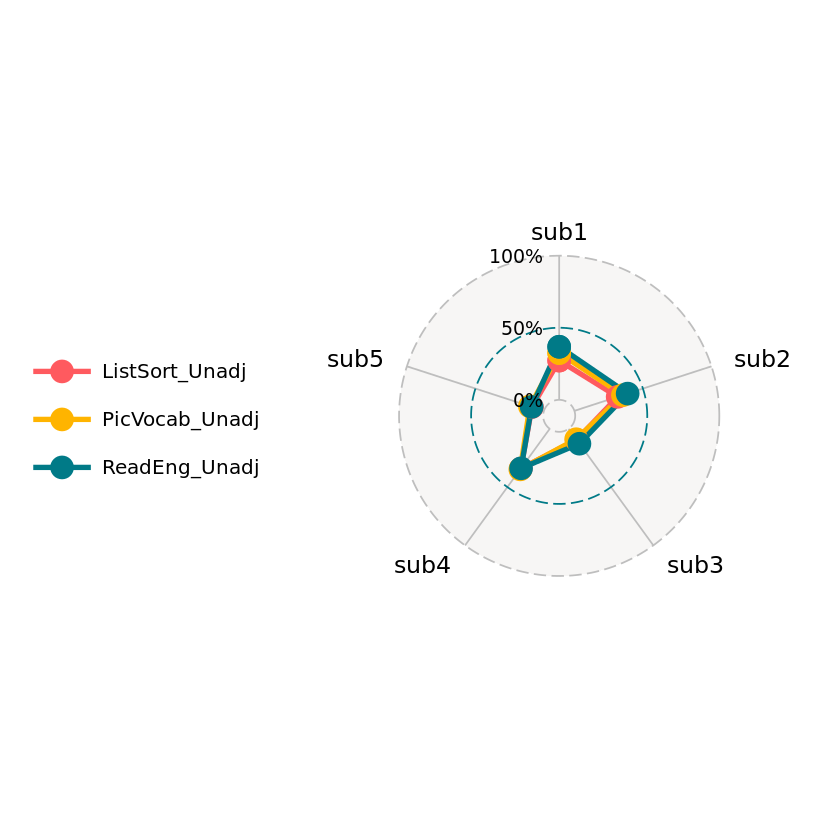

In [28]:
# plot R2 radar math
image_math=ggradar(MyData_math, grid.min = 0,
  grid.mid = 0.05, grid.max = 0.1, axis.label.size = 5, grid.label.size = 5 ,legend.text.size =5) +
  theme(legend.text = element_text(size = 12))
image_math

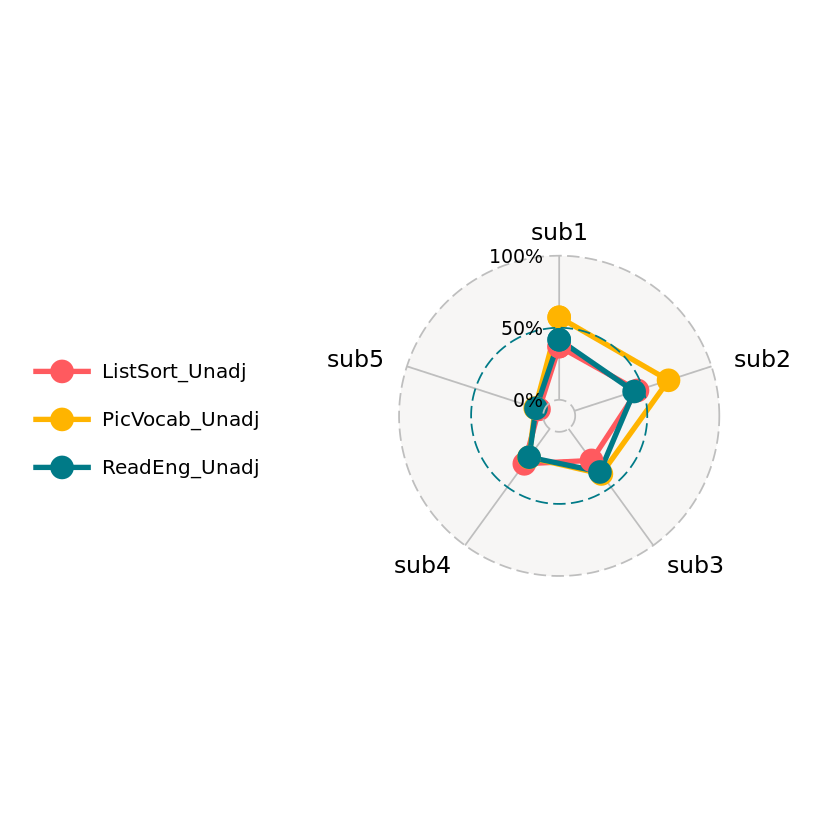

In [25]:
# plot R2 radar math
image_story=ggradar(MyData_story, grid.min = 0,
  grid.mid = 0.05, grid.max = 0.1, axis.label.size = 5, grid.label.size = 5 ,legend.text.size =5) +
  theme(legend.text = element_text(size = 12))
image_story

In [30]:
setwd("/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/")
setwd("/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/")

In [32]:
ggsave(file="math_R-squared.svg", plot=image_math, width=10, height=8)
ggsave(file="story_R-squared.svg", plot=image_story, width=10, height=8)